In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
base_path = ''

In [2]:
df = pd.read_csv(base_path + 'pmart.csv')
df

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
0,2022-04-04,13407001112,매직스폰지대,1,2200,2200,4,0
1,2022-04-14,13407001112,매직스폰지대,2,2200,4400,4,3
2,2022-05-14,13407001112,매직스폰지대,1,2200,2200,5,5
3,2022-05-20,13407001112,매직스폰지대,1,2200,2200,5,4
4,2022-06-04,13407001112,매직스폰지대,1,2200,2200,6,5
...,...,...,...,...,...,...,...,...
416307,2022-05-04,9334214017686,시저연어와쇠고기1Kg,1,9900,9900,5,2
416308,2022-08-29,9334214017686,시저연어와쇠고기1Kg,1,9900,9900,8,0
416309,2022-09-06,9334214017686,시저연어와쇠고기1Kg,1,9900,9900,9,1
416310,2022-09-16,9334214017686,시저연어와쇠고기1Kg,1,9900,9900,9,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416312 entries, 0 to 416311
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   SAL_DT    416312 non-null  object
 1   PLU_CD    416312 non-null  int64 
 2   GDS_NM    416312 non-null  object
 3   SALE_QTY  416312 non-null  int64 
 4   SALE_PRC  416312 non-null  int64 
 5   SALE_AMT  416312 non-null  int64 
 6   month     416312 non-null  int64 
 7   weekday   416312 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 25.4+ MB


In [4]:
df = df.drop(df[df.SALE_AMT==0].index)

In [5]:
q1=df['SALE_AMT'].quantile(0.25)
q2=df['SALE_AMT'].quantile(0.5)
q3=df['SALE_AMT'].quantile(0.75)
iqr=q3-q1

In [6]:
condition=df['SALE_AMT']>q3+1.5*iqr
df[condition]

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
45,2022-04-18,200000,완숙토마토,1,19000,19000,4,0
84,2022-05-06,200000,완숙토마토,2,5800,11600,5,4
199,2022-06-29,200000,완숙토마토,1,26000,26000,6,2
258,2022-07-28,200000,완숙토마토,1,29000,29000,7,3
268,2022-08-06,200000,완숙토마토,2,6000,12000,8,5
...,...,...,...,...,...,...,...,...
416213,2022-06-11,8888021203578,에너자이저맥스,1,11500,11500,6,5
416214,2022-06-29,8888021203578,에너자이저맥스,1,11500,11500,6,2
416215,2022-06-29,8888021203578,에너자이저맥스,1,11500,11500,6,2
416216,2022-07-28,8888021203578,에너자이저맥스,1,11500,11500,7,3


In [7]:
a=df[condition].index
df.drop(a,inplace=True)

In [8]:
drap = df[df['GDS_NM'].str.contains('재사용')].index
df.drop(drap, inplace=True)

In [9]:
drap = df[df['GDS_NM'].str.contains('배달봉투')].index
df.drop(drap, inplace=True)

In [10]:
drap = df[df['GDS_NM'].str.contains('종량제')].index
df.drop(drap, inplace=True)

In [11]:
drap = df[df['GDS_NM'].str.contains('음식물')].index
df.drop(drap, inplace=True)

In [12]:
drap = df[df['GDS_NM'].str.contains('소주공병')].index
df.drop(drap, inplace=True)

In [13]:
drap = df[df['GDS_NM'].str.contains('배송비')].index
df.drop(drap, inplace=True)

In [14]:
dfw = df[['PLU_CD', 'GDS_NM', 'weekday', 'SALE_QTY', 'SALE_AMT']]

In [15]:
dfw

,PLU_CD,GDS_NM,weekday,SALE_QTY,SALE_AMT
0,13407001112,매직스폰지대,0,1,2200
1,13407001112,매직스폰지대,3,2,4400
2,13407001112,매직스폰지대,5,1,2200
3,13407001112,매직스폰지대,4,1,2200
4,13407001112,매직스폰지대,5,1,2200
...,...,...,...,...,...
416307,9334214017686,시저연어와쇠고기1Kg,2,1,9900
416308,9334214017686,시저연어와쇠고기1Kg,0,1,9900
416309,9334214017686,시저연어와쇠고기1Kg,1,1,9900
416310,9334214017686,시저연어와쇠고기1Kg,4,1,9900


In [16]:
dfw0 = dfw.query('weekday == 0')
dfw1 = dfw.query('weekday == 1')
dfw2 = dfw.query('weekday == 2')
dfw3 = dfw.query('weekday == 3')
dfw4 = dfw.query('weekday == 4')
dfw5 = dfw.query('weekday == 5')
dfw6 = dfw.query('weekday == 6')

In [17]:
dfw0_1 = dfw0.groupby(['GDS_NM', 'weekday']).sum()
dfw1_1 = dfw1.groupby(['GDS_NM', 'weekday']).sum()
dfw2_1 = dfw2.groupby(['GDS_NM', 'weekday']).sum()
dfw3_1 = dfw3.groupby(['GDS_NM', 'weekday']).sum()
dfw4_1 = dfw4.groupby(['GDS_NM', 'weekday']).sum()
dfw5_1 = dfw5.groupby(['GDS_NM', 'weekday']).sum()
dfw6_1 = dfw6.groupby(['GDS_NM', 'weekday']).sum()

In [18]:
dfw0_2 = dfw0_1.reset_index()
dfw1_2 = dfw1_1.reset_index()
dfw2_2 = dfw2_1.reset_index()
dfw3_2 = dfw3_1.reset_index()
dfw4_2 = dfw4_1.reset_index()
dfw5_2 = dfw5_1.reset_index()
dfw6_2 = dfw6_1.reset_index()

In [19]:
dfw0_2

,GDS_NM,weekday,PLU_CD,SALE_QTY,SALE_AMT
0,2080슬림앤소프트칫솔일반모,0,44005231636630,7,7000
1,2080시그니처토탈블루기획,0,96811509416468,11,66300
2,2080칫솔미세모기획,0,35204187555460,4,21920
3,2080칫솔탄력모기획,0,17602093777716,2,10960
4,2080토탈후레쉬민트기획,0,70408370484808,8,47840
...,...,...,...,...,...
3960,휴대용물병,0,8803733708050,1,4000
3961,흑토마토,0,1230498,6,37500
3962,흙마늘훈제오리,0,123332340046552,14,125900
3963,흙생강,0,15492554,79,126400


In [20]:
dfw0_3 = dfw0_2[['GDS_NM', 'SALE_QTY']]
dfw1_3 = dfw1_2[['GDS_NM', 'SALE_QTY']]
dfw2_3 = dfw2_2[['GDS_NM', 'SALE_QTY']]
dfw3_3 = dfw3_2[['GDS_NM', 'SALE_QTY']]
dfw4_3 = dfw4_2[['GDS_NM', 'SALE_QTY']]
dfw5_3 = dfw5_2[['GDS_NM', 'SALE_QTY']]
dfw6_3 = dfw6_2[['GDS_NM', 'SALE_QTY']]

In [21]:
dfw0_4 = dfw0_2[['GDS_NM', 'SALE_AMT']]
dfw1_4 = dfw1_2[['GDS_NM', 'SALE_AMT']]
dfw2_4 = dfw2_2[['GDS_NM', 'SALE_AMT']]
dfw3_4 = dfw3_2[['GDS_NM', 'SALE_AMT']]
dfw4_4 = dfw4_2[['GDS_NM', 'SALE_AMT']]
dfw5_4 = dfw5_2[['GDS_NM', 'SALE_AMT']]
dfw6_4 = dfw6_2[['GDS_NM', 'SALE_AMT']]

In [22]:
dfw0_3

,GDS_NM,SALE_QTY
0,2080슬림앤소프트칫솔일반모,7
1,2080시그니처토탈블루기획,11
2,2080칫솔미세모기획,4
3,2080칫솔탄력모기획,2
4,2080토탈후레쉬민트기획,8
...,...,...
3960,휴대용물병,1
3961,흑토마토,6
3962,흙마늘훈제오리,14
3963,흙생강,79


In [23]:
dfw0_4

,GDS_NM,SALE_AMT
0,2080슬림앤소프트칫솔일반모,7000
1,2080시그니처토탈블루기획,66300
2,2080칫솔미세모기획,21920
3,2080칫솔탄력모기획,10960
4,2080토탈후레쉬민트기획,47840
...,...,...
3960,휴대용물병,4000
3961,흑토마토,37500
3962,흙마늘훈제오리,125900
3963,흙생강,126400


In [24]:
dfw0_5 = dfw0_3.sort_values('SALE_QTY', ascending=False).head(50)
dfw1_5 = dfw1_3.sort_values('SALE_QTY', ascending=False).head(50)
dfw2_5 = dfw2_3.sort_values('SALE_QTY', ascending=False).head(50)
dfw3_5 = dfw3_3.sort_values('SALE_QTY', ascending=False).head(50)
dfw4_5 = dfw4_3.sort_values('SALE_QTY', ascending=False).head(50)
dfw5_5 = dfw5_3.sort_values('SALE_QTY', ascending=False).head(50)
dfw6_5 = dfw6_3.sort_values('SALE_QTY', ascending=False).head(50)

In [25]:
dfw0_5

,GDS_NM,SALE_QTY
1648,백오이,1551
1492,바나나,1219
2217,애호박,1190
714,댓골순두부,915
705,대파,890
2748,재봉투10L1매,777
1883,상추,572
2232,양파소,556
2227,양배추,543
1445,무우,517


In [26]:
dfw0_6 = dfw0_4.sort_values('SALE_AMT', ascending=False).head(50)
dfw1_6 = dfw1_4.sort_values('SALE_AMT', ascending=False).head(50)
dfw2_6 = dfw2_4.sort_values('SALE_AMT', ascending=False).head(50)
dfw3_6 = dfw3_4.sort_values('SALE_AMT', ascending=False).head(50)
dfw4_6 = dfw4_4.sort_values('SALE_AMT', ascending=False).head(50)
dfw5_6 = dfw5_4.sort_values('SALE_AMT', ascending=False).head(50)
dfw6_6 = dfw6_4.sort_values('SALE_AMT', ascending=False).head(50)

In [27]:
dfw0_6

,GDS_NM,SALE_AMT
1648,백오이,4203160
2220,양광사과,3983200
1492,바나나,3833840
2038,성주꿀참외,3627800
2217,애호박,1863360
705,대파,1850640
2756,정담은왕란30구,1721800
704,대추방울토마토,1712800
1283,맑은청정란30구,1510160
2232,양파소,1489700


In [28]:
plt.rcParams['font.family'] = 'NanumGothic'

# Weekday QTY

C:\Users\min\AppData\Local\Temp\ipykernel_3632\3373251331.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


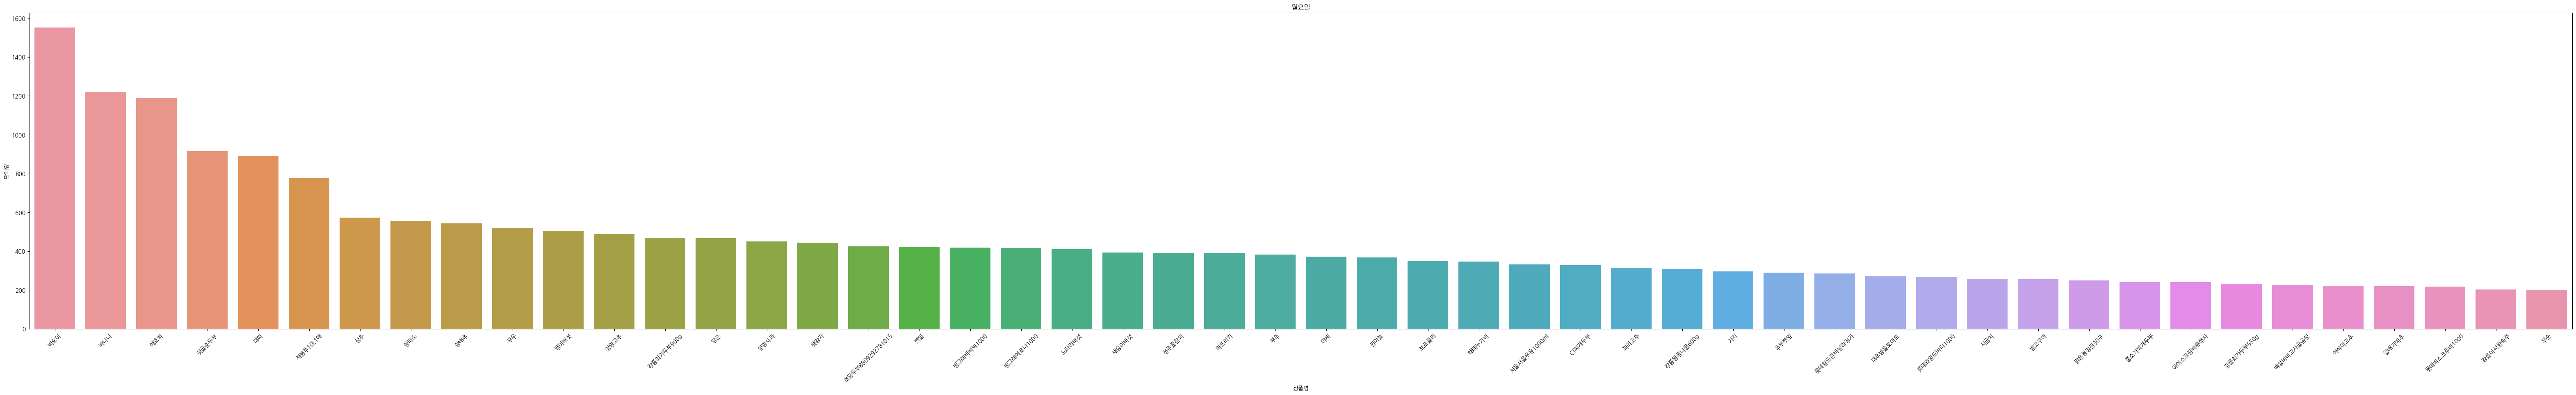

In [29]:
plt.figure(figsize=(80, 10))
plt.title('월요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw0_5, x='GDS_NM', y='SALE_QTY')

plt.xlabel('상품명')
plt.ylabel('판매량')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_3632\2372147515.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


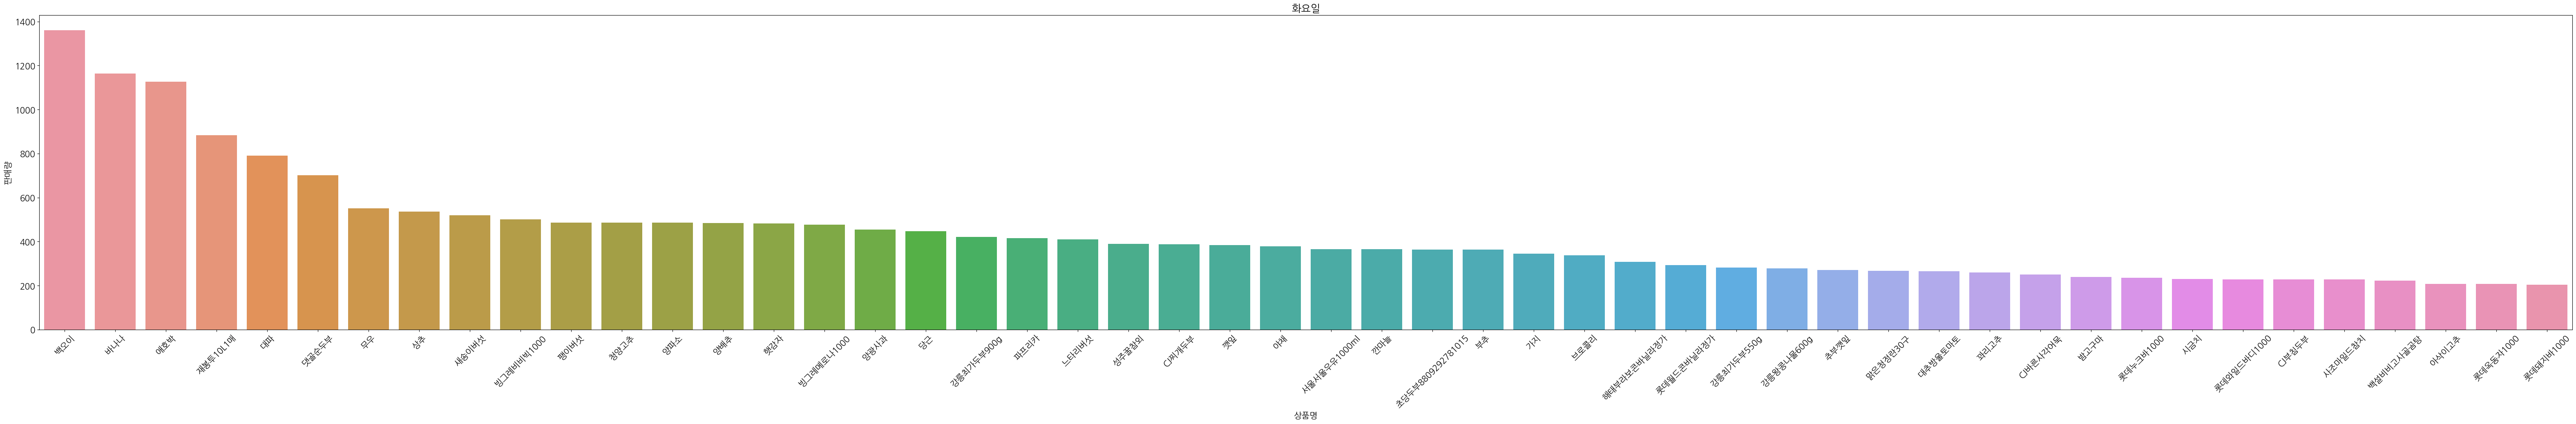

In [30]:
plt.figure(figsize=(80, 10))
plt.title('화요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw1_5, x='GDS_NM', y='SALE_QTY')

plt.xlabel('상품명')
plt.ylabel('판매량')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_3632\1666916716.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


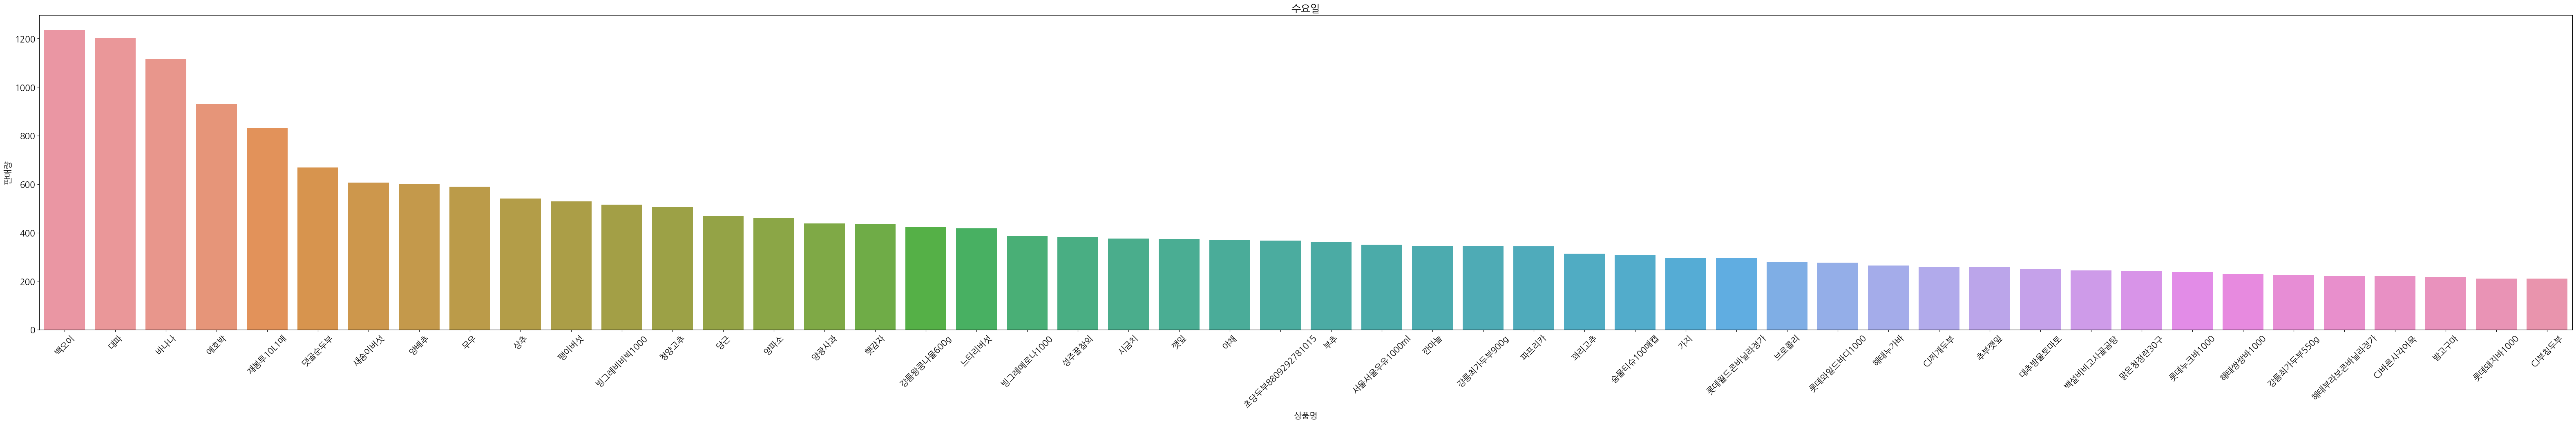

In [31]:
plt.figure(figsize=(80, 10))
plt.title('수요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw2_5, x='GDS_NM', y='SALE_QTY')

plt.xlabel('상품명')
plt.ylabel('판매량')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_3632\2703600391.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


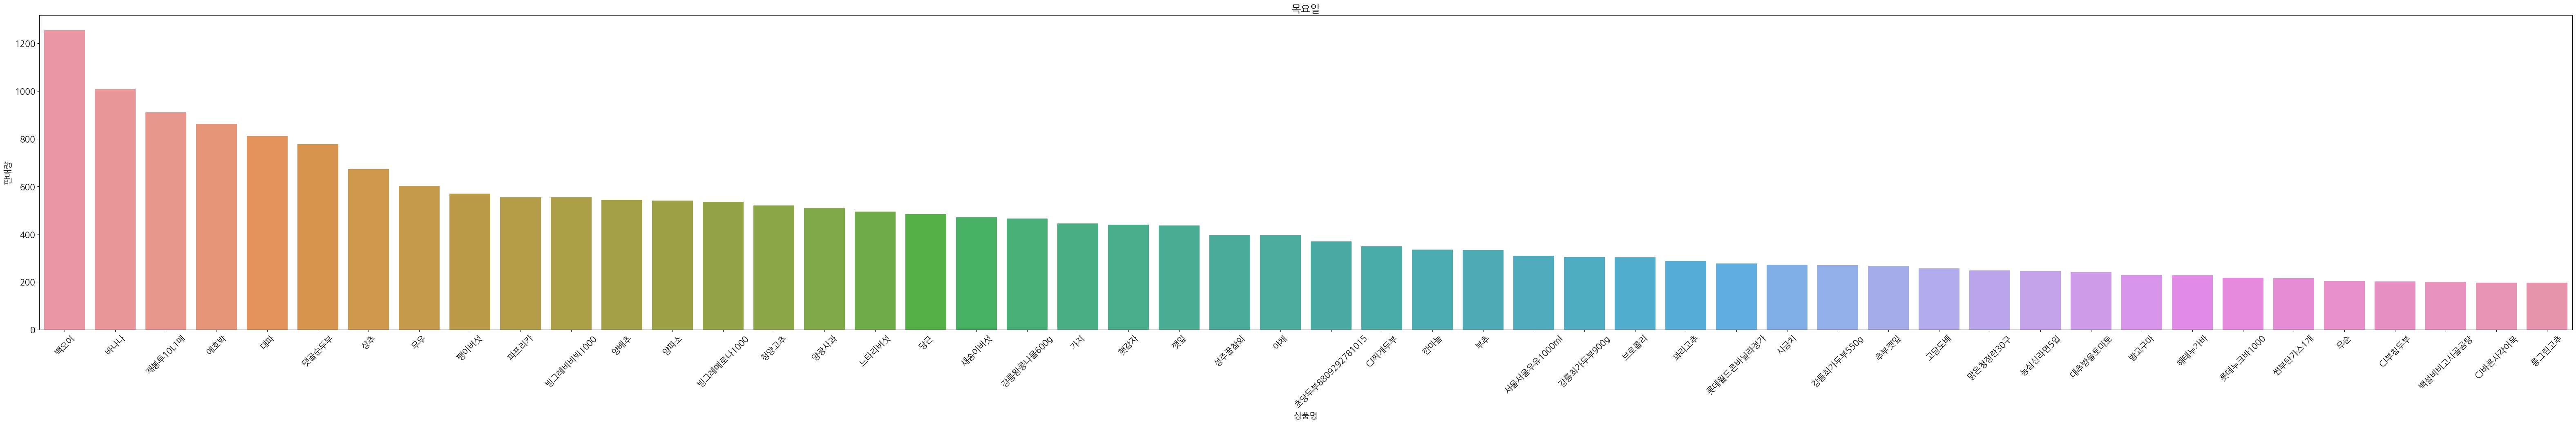

In [32]:
plt.figure(figsize=(80, 10))
plt.title('목요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw3_5, x='GDS_NM', y='SALE_QTY')

plt.xlabel('상품명')
plt.ylabel('판매량')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_3632\3393297227.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


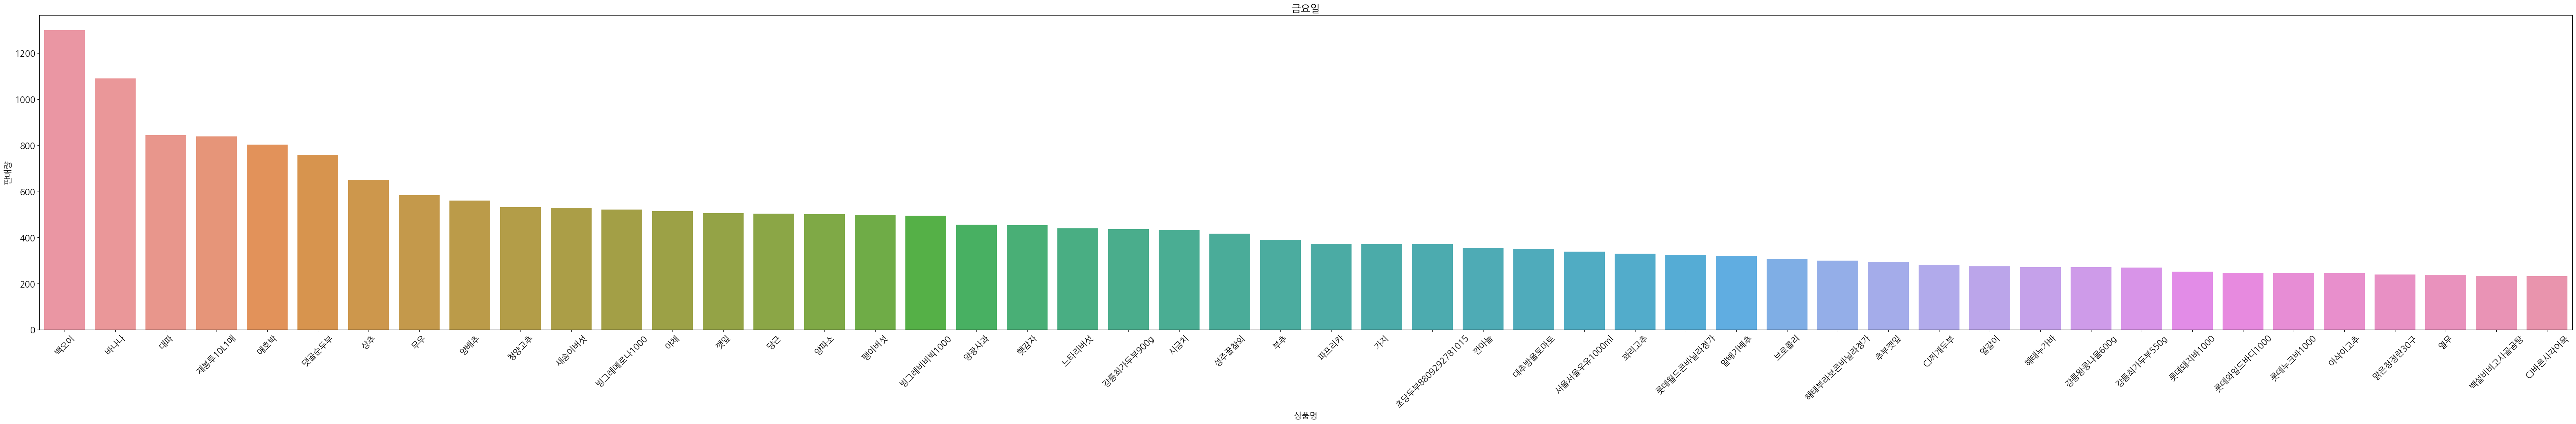

In [33]:
plt.figure(figsize=(80, 10))
plt.title('금요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw4_5, x='GDS_NM', y='SALE_QTY')

plt.xlabel('상품명')
plt.ylabel('판매량')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_3632\3819937974.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


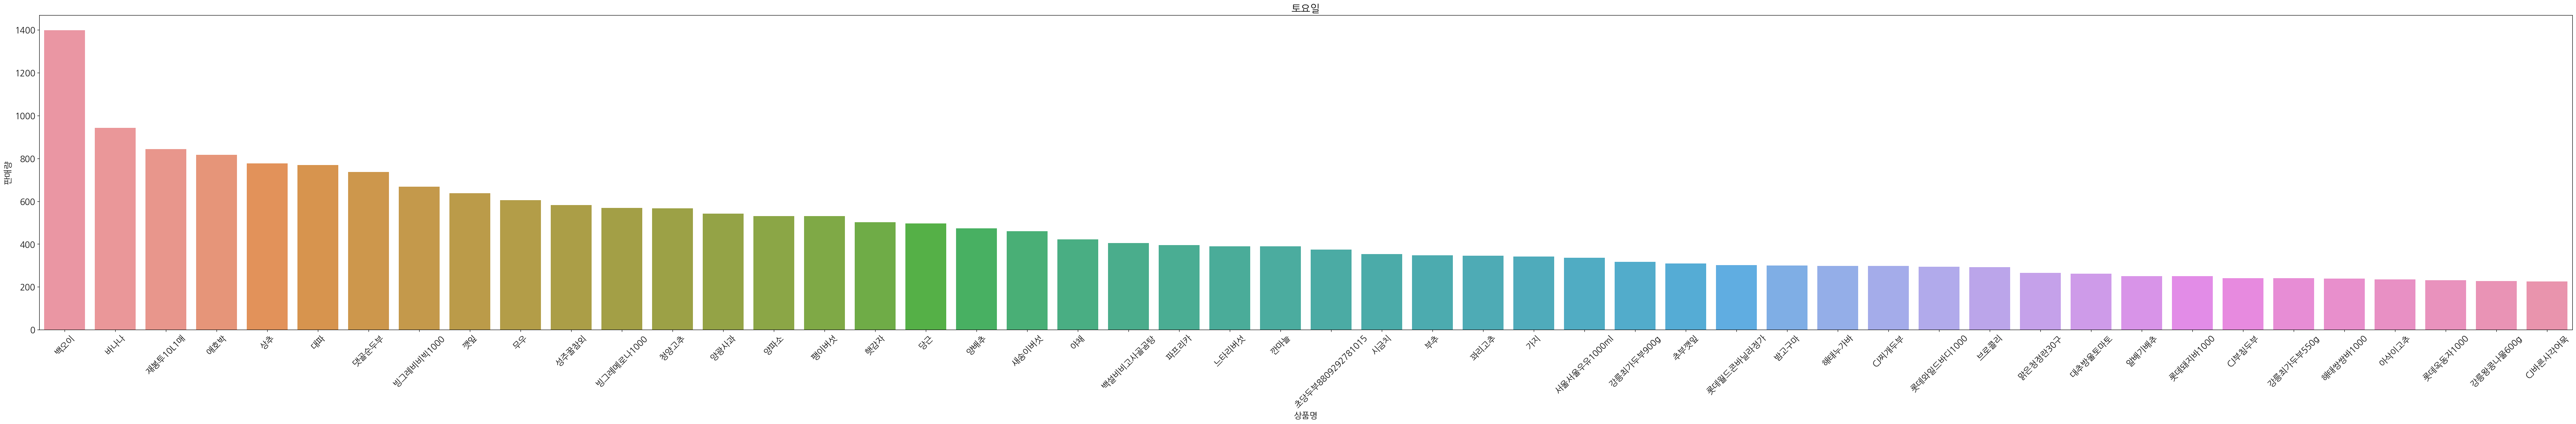

In [34]:
plt.figure(figsize=(80, 10))
plt.title('토요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw5_5, x='GDS_NM', y='SALE_QTY')

plt.xlabel('상품명')
plt.ylabel('판매량')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_3632\729456865.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


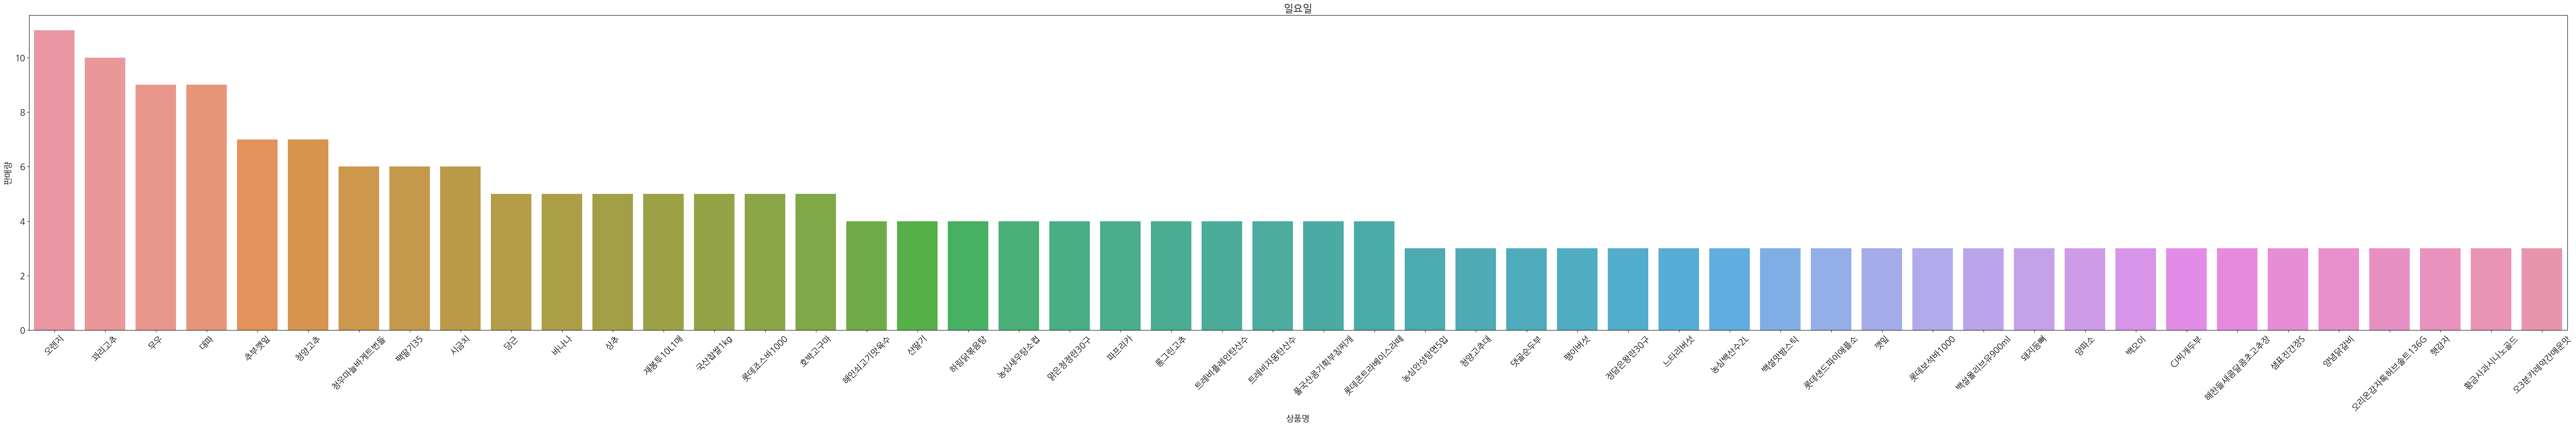

In [35]:
plt.figure(figsize=(80, 10))
plt.title('일요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw6_5, x='GDS_NM', y='SALE_QTY')

plt.xlabel('상품명')
plt.ylabel('판매량')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

---

# Weekday AMT

C:\Users\min\AppData\Local\Temp\ipykernel_3632\650134066.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


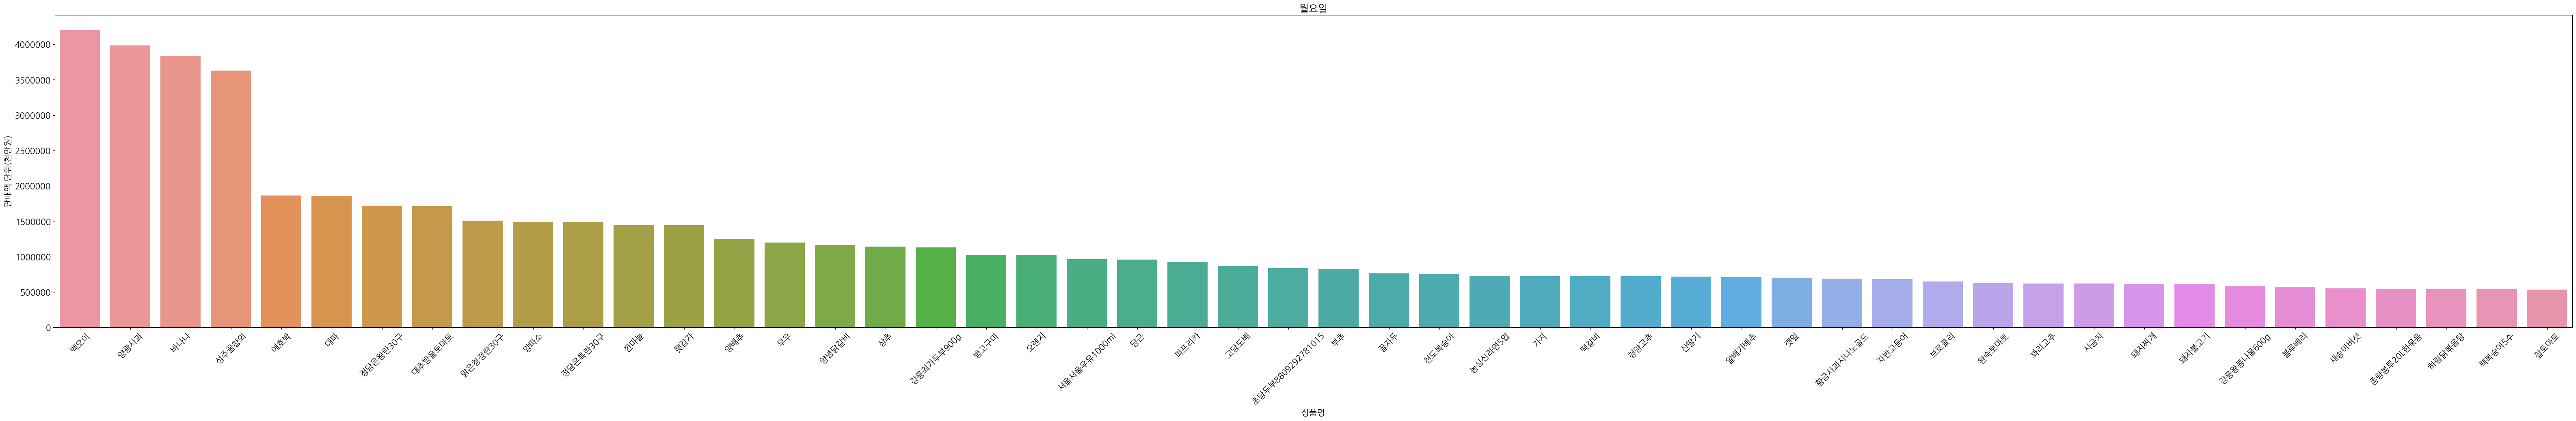

In [36]:
plt.figure(figsize=(80, 10))
plt.title('월요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw0_6, x='GDS_NM', y='SALE_AMT')

plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_3632\2857367066.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


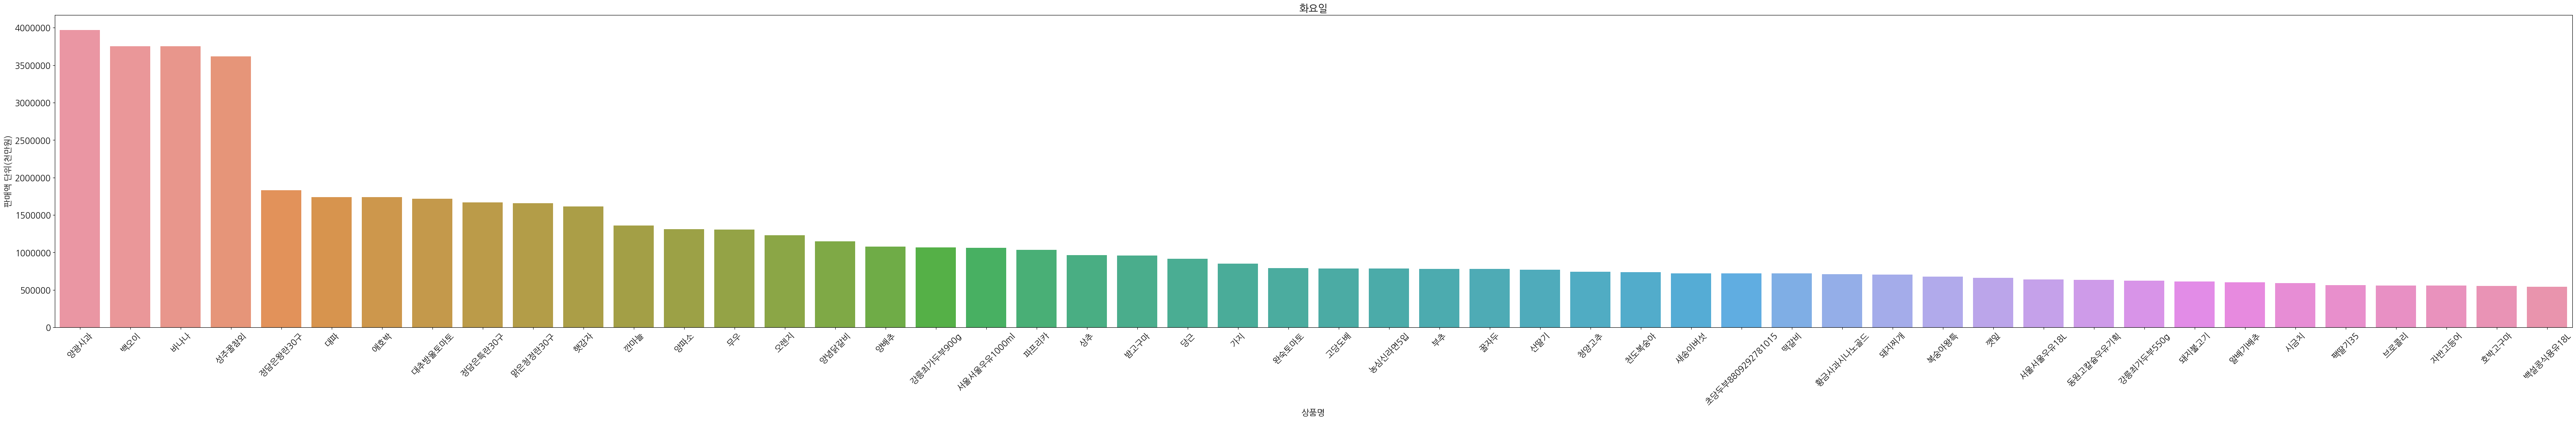

In [37]:
plt.figure(figsize=(80, 10))
plt.title('화요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw1_6, x='GDS_NM', y='SALE_AMT')

plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_3632\3088576110.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


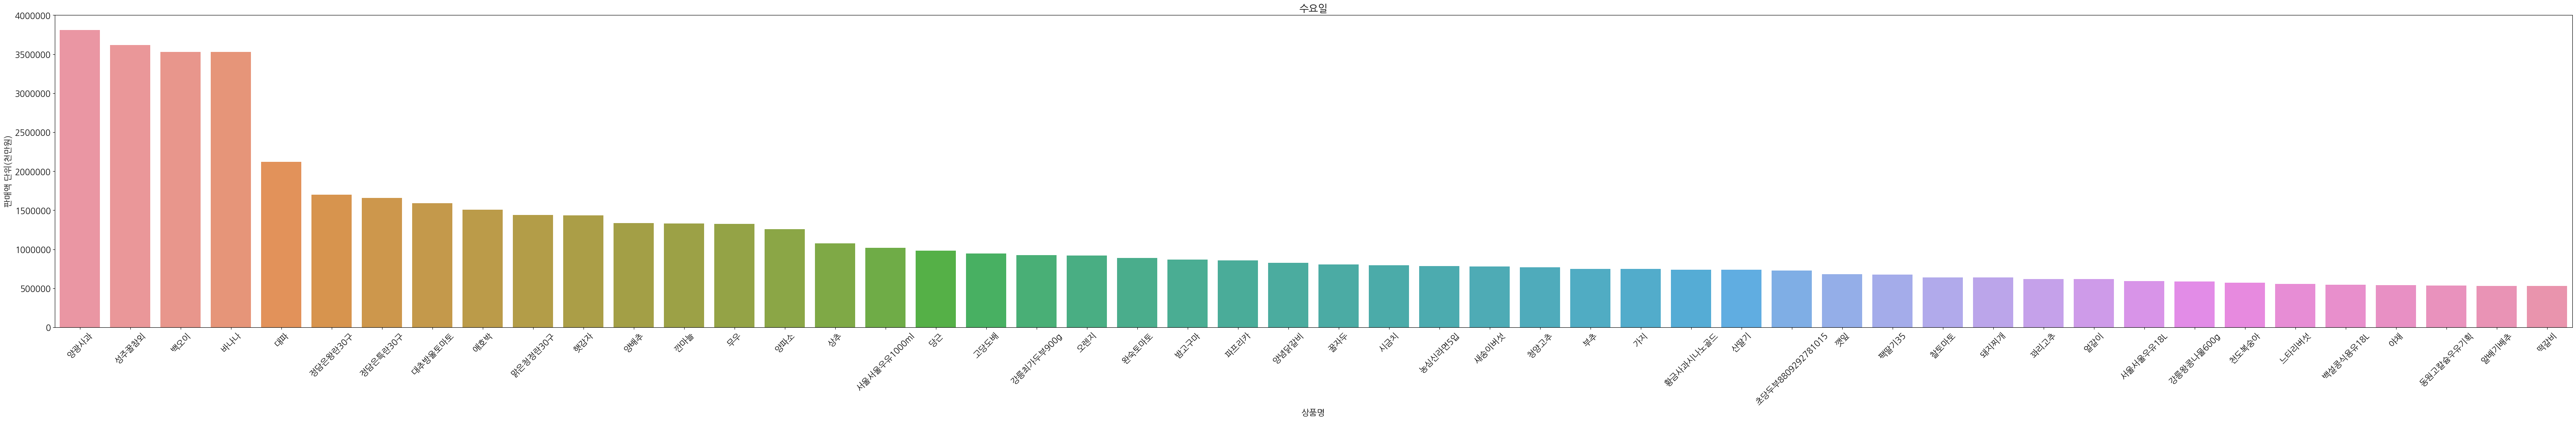

In [38]:
plt.figure(figsize=(80, 10))
plt.title('수요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw2_6, x='GDS_NM', y='SALE_AMT')

plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_3632\1155969974.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


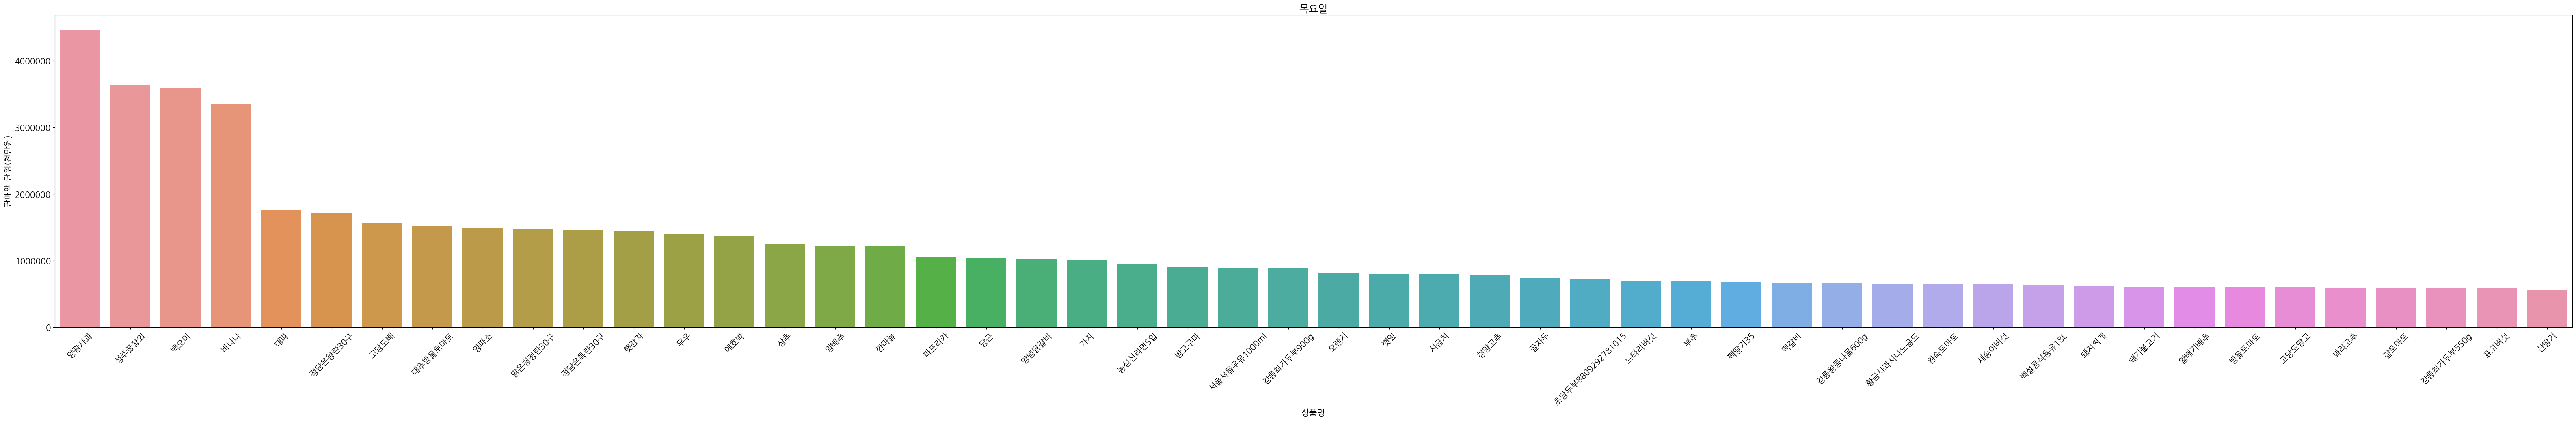

In [39]:
plt.figure(figsize=(80, 10))
plt.title('목요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw3_6, x='GDS_NM', y='SALE_AMT')

plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_3632\3328603760.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


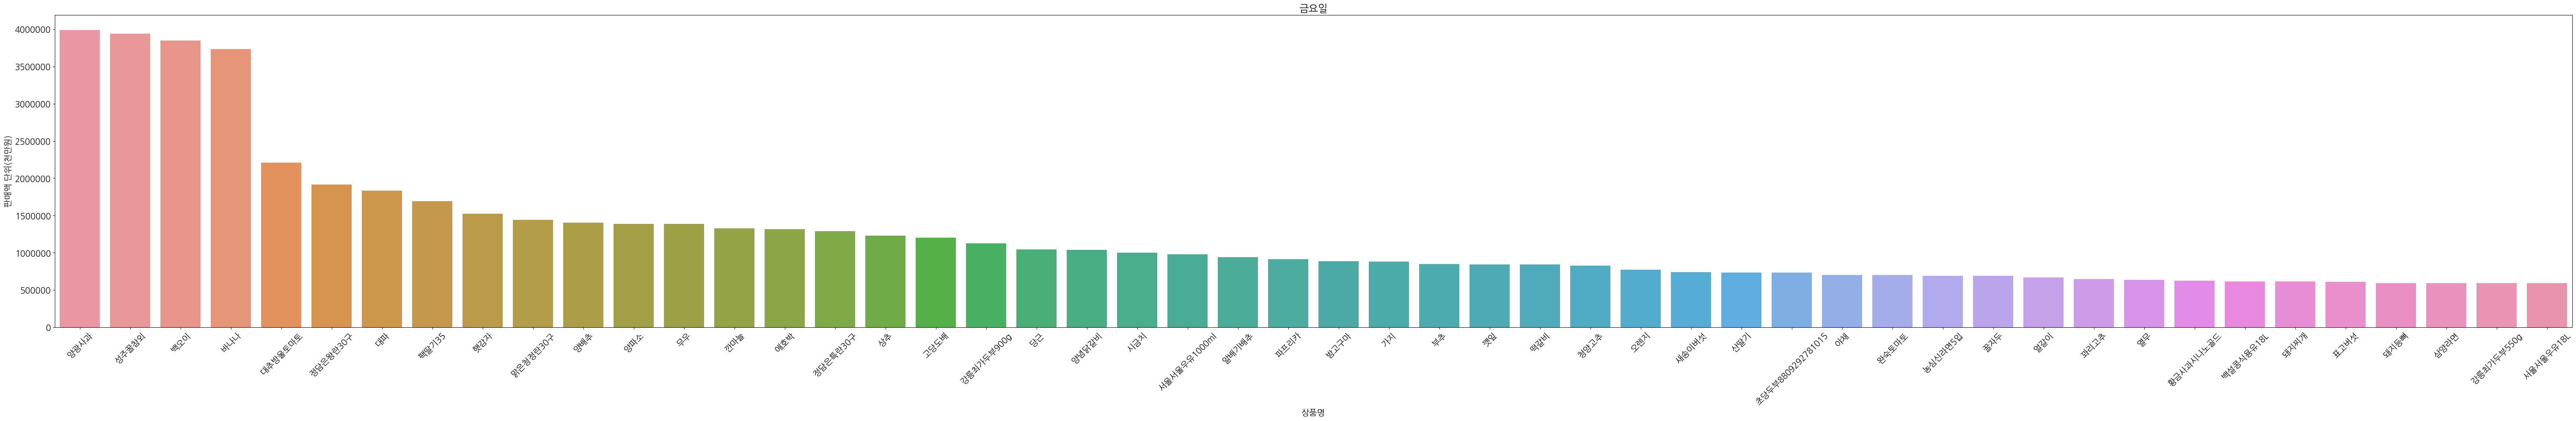

In [40]:
plt.figure(figsize=(80, 10))
plt.title('금요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw4_6, x='GDS_NM', y='SALE_AMT')

plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_3632\293229473.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


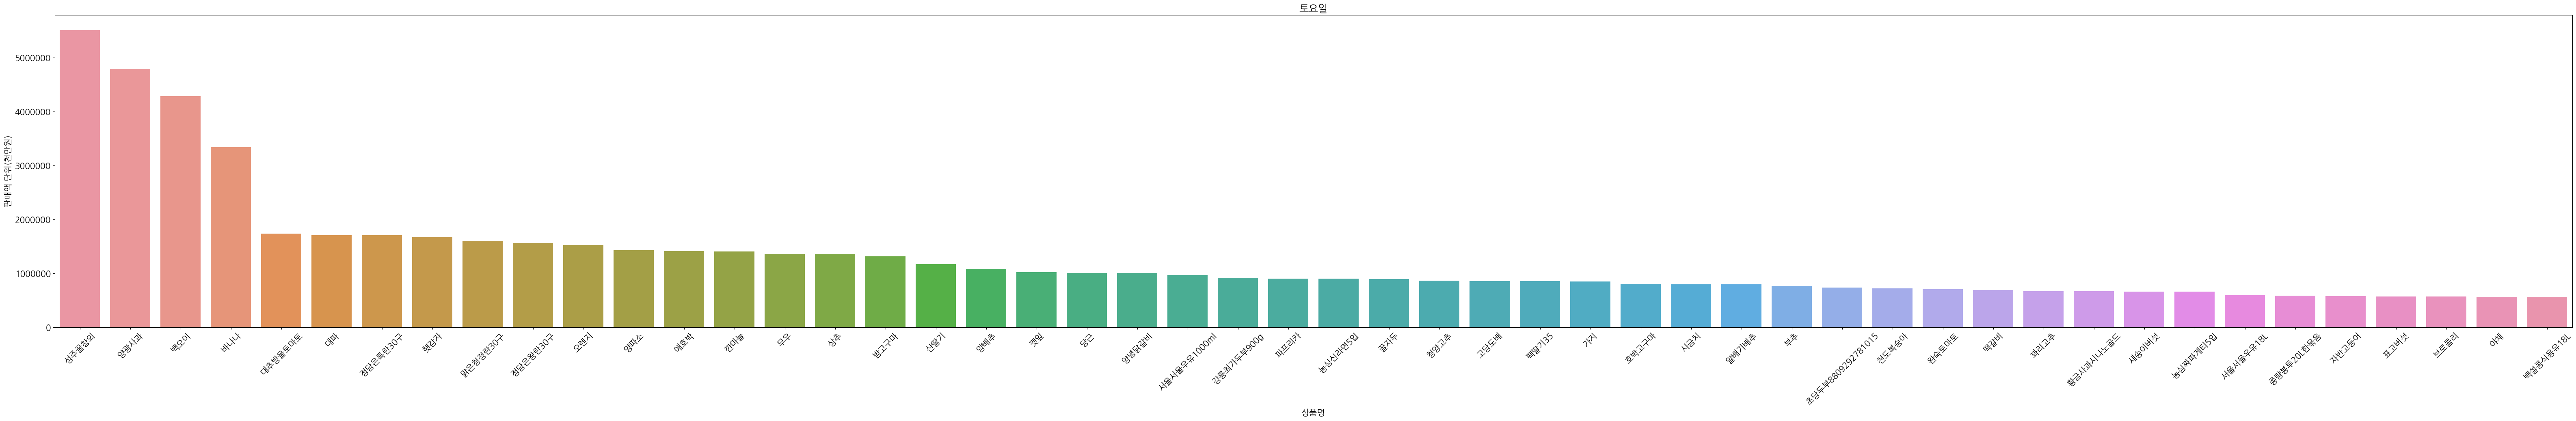

In [41]:
plt.figure(figsize=(80, 10))
plt.title('토요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw5_6, x='GDS_NM', y='SALE_AMT')

plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_3632\3576220660.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


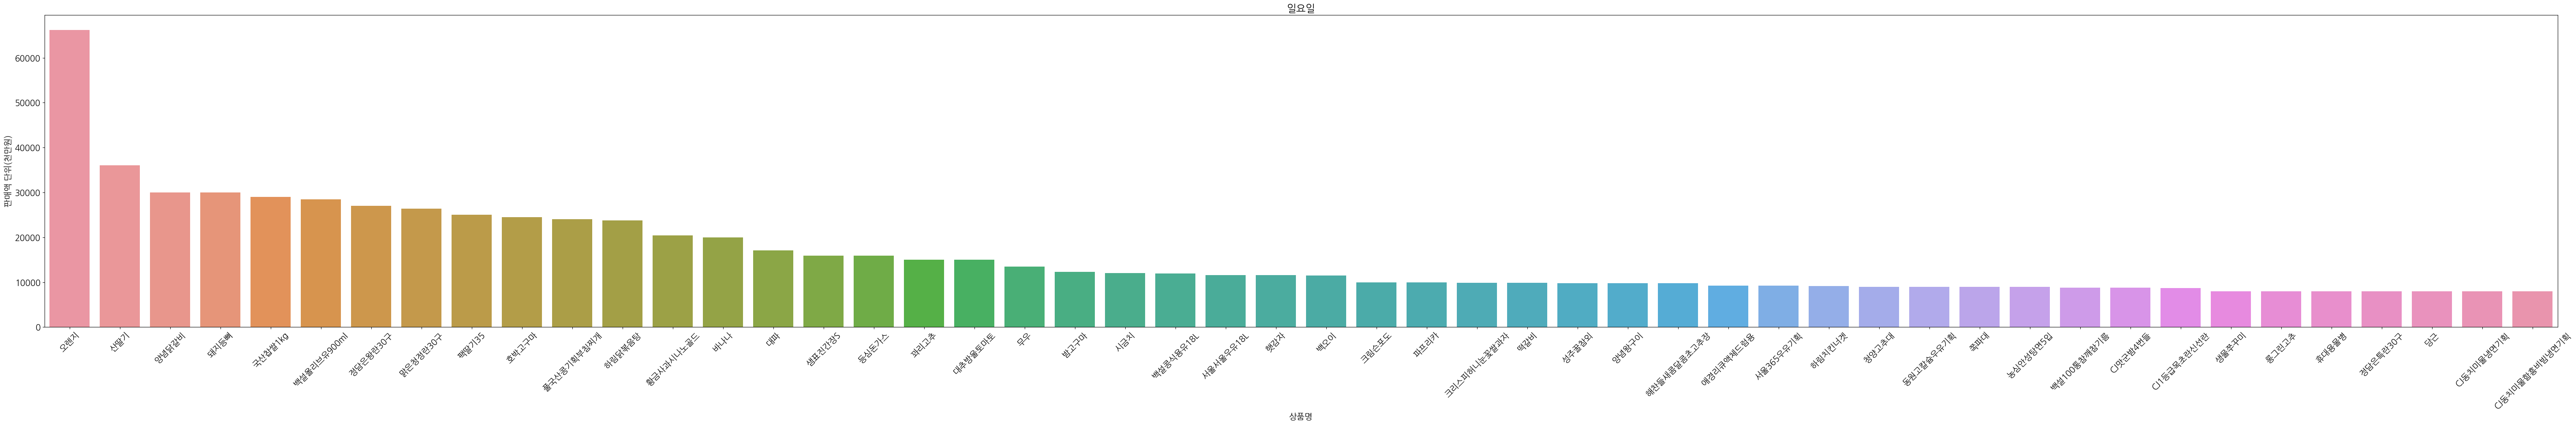

In [42]:
plt.figure(figsize=(80, 10))
plt.title('일요일')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfw6_6, x='GDS_NM', y='SALE_AMT')

plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()